In [ ]:
import PIL
import gym_super_mario_bros
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT
from nes_py.wrappers import BinarySpaceToDiscreteSpaceEnv
import random
import time

#All levels, starting at 1-1. With frameskip 4.
env = gym_super_mario_bros.make('SuperMarioBros2-v0')
#Else use SuperMarioBrosNoFrameskip-v0

env = BinarySpaceToDiscreteSpaceEnv(env, COMPLEX_MOVEMENT)
env.reset()

policy = [0, 0, 0, 0.277, 0.723, 0, 0, 0, 0, 0, 0]
def sample_action(pol):
    r = random.random()
    s = 0
    a = -1
    while s < r:
        a += 1
        s += pol[a]
    return a

theseed = 1 #Here is a fast seed I found
random.seed(theseed)
resets = 0
while True:
    observation,reward,done,info = env.step(sample_action(policy))
    #This was added to show the last life before the bug in human speed
    if resets==4 and info["life"]==1:
        time.sleep(1/15)
    env.render(mode='human')
    if done:
        env.reset()
        resets += 1
        #Run at most 20 episodes on each given seed.
        #If interrupted shortly after seeing the bug,
        #starting from the last seed is likely to
        #reproduce it fast. Although this is not 100%
        #certain, it may be a good place to start.
        if resets == 20:
            theseed += 1
            random.seed(theseed)
            resets = 0
env.close()

In [20]:
import PIL
import gym_super_mario_bros
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT
from nes_py.wrappers import BinarySpaceToDiscreteSpaceEnv
import random
import time

#All levels, starting at 1-1. With frameskip 4.
env = gym_super_mario_bros.make('SuperMarioBros2-v0')
#Else use SuperMarioBrosNoFrameskip-v0

env = BinarySpaceToDiscreteSpaceEnv(env, COMPLEX_MOVEMENT)
s = env.reset()

In [21]:
env.observation_space.shape

(240, 256, 3)

In [22]:
env.action_space.n

12

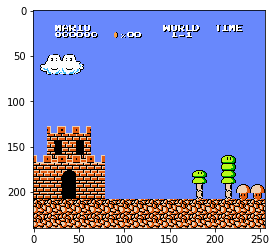

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(env.render('rgb_array'))

In [24]:
from atari_util import PreprocessAtari

def make_env(env):
    env = PreprocessAtari(env, height=42, width=42,
                          crop = lambda img: img[60:-30, 5:],
                          dim_order = 'tensorflow',
                          color=False, n_frames=4,
                          reward_scale = 0.01)
    return env

env = make_env(env)
obs_shape = env.observation_space.shape
n_actions = env.action_space.n

print("Observation shape:", obs_shape)
print("Num actions:", n_actions)

Observation shape: (42, 42, 4)
Num actions: 12


In [25]:
s = env.reset()
for _ in range(100):
    s, _, _, _ = env.step(env.action_space.sample())

(42, 42, 4)


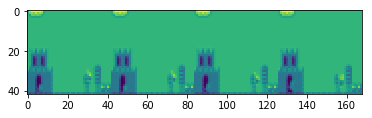

In [13]:
plt.imshow(s.transpose([0,2,1]).reshape([42,-1]))